In [5]:
your_local_path = "C:/Users/sylve/Downloads/Machine learning/Dataset/Project datasets modified/Loan Payment/Loan Payment/"


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn import utils
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#sns.set(style="darkgridgrid")
%matplotlib inline

In [7]:
df1=pd.read_csv(your_local_path+"Loan payments data.csv")


In [8]:
df1['effective_date']= pd.to_datetime(df1['effective_date'])


In [9]:
df1['due_date'] = pd.to_datetime(df1['due_date'])


In [10]:
df1['paid_off_time'] = pd.to_datetime(df1['paid_off_time'])


In [13]:
df1.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender', 'Loan_status_code'],
      dtype='object')

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
Loan_ID             500 non-null object
loan_status         500 non-null object
Principal           500 non-null int64
terms               500 non-null int64
effective_date      500 non-null datetime64[ns]
due_date            500 non-null datetime64[ns]
paid_off_time       400 non-null datetime64[ns]
past_due_days       200 non-null float64
age                 500 non-null int64
education           500 non-null object
Gender              500 non-null object
Loan_status_code    500 non-null int32
Gender_code         500 non-null int32
education_code      500 non-null int32
dtypes: datetime64[ns](3), float64(1), int32(3), int64(3), object(4)
memory usage: 48.9+ KB


In [19]:
lb_loan_status = LabelEncoder()
df1["Loan_status_code"] = lb_loan_status.fit_transform(df1["loan_status"])
df1[["loan_status","Loan_status_code"]].head()

,loan_status,Loan_status_code
0,PAIDOFF,2
1,PAIDOFF,2
2,PAIDOFF,2
3,PAIDOFF,2
4,PAIDOFF,2


In [20]:
lb = LabelEncoder()
df1["Gender_code"] = lb.fit_transform(df1["Gender"])
df1["education_code"] = lb.fit_transform(df1["education"])
print(df1[["Gender", "Gender_code"]].head(10))
print(df1[["education", "education_code"]].head(10) )

   Gender  Gender_code
0    male            1
1  female            0
2  female            0
3    male            1
4  female            0
5    male            1
6    male            1
7    male            1
8    male            1
9    male            1
              education  education_code
0  High School or Below               1
1              Bechalor               0
2              Bechalor               0
3               college               3
4               college               3
5       Master or Above               2
6               college               3
7               college               3
8               college               3
9               college               3


In [21]:
df1.head()


,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,Loan_status_code,Gender_code,education_code
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14 19:31:00,NaN,45,High School or Below,male,2,1,1
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07 09:00:00,NaN,50,Bechalor,female,2,0,0
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25 16:58:00,NaN,33,Bechalor,female,2,0,0
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22 20:00:00,NaN,27,college,male,2,1,3
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23 21:36:00,NaN,28,college,female,2,0,3


In [23]:
df1.describe()


,Principal,terms,past_due_days,age,Loan_status_code,Gender_code,education_code
count,500.000000,500.000000,200.00000,500.000000,500.000000,500.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000,1.400000,0.84600,1.754000
std,115.240274,8.000064,29.38088,6.084784,0.800801,0.36131,1.155922
min,300.000000,7.000000,1.00000,18.000000,0.000000,0.00000,0.000000
25%,1000.000000,15.000000,3.00000,27.000000,1.000000,1.00000,1.000000
50%,1000.000000,30.000000,37.00000,30.000000,2.000000,1.00000,1.000000
75%,1000.000000,30.000000,60.00000,35.000000,2.000000,1.00000,3.000000
max,1000.000000,30.000000,76.00000,51.000000,2.000000,1.00000,3.000000


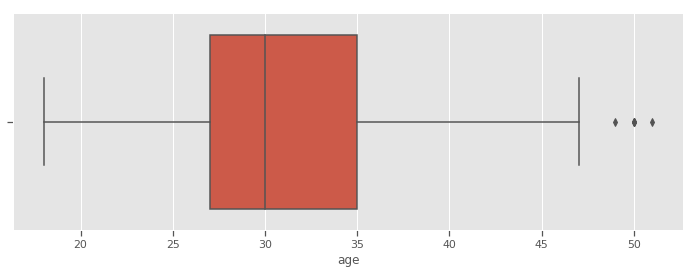

In [24]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(12,4))
sns.boxplot(x="age", data=df1)


In [25]:
df1[df1.age > 48]


,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,Loan_status_code,Gender_code,education_code
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07 09:00:00,NaN,50,Bechalor,female,2,0,0
49,xqd20160050,PAIDOFF,800,15,2016-09-11,2016-09-25,2016-09-25 19:21:00,NaN,50,High School or Below,male,2,1,1
216,xqd20160217,PAIDOFF,1000,15,2016-09-12,2016-09-26,2016-09-21 08:11:00,NaN,50,High School or Below,male,2,1,1
260,xqd20160261,PAIDOFF,800,15,2016-09-13,2016-09-27,2016-09-26 07:48:00,NaN,51,college,male,2,1,3
342,xqd20160343,COLLECTION,1000,15,2016-09-11,2016-09-25,NaT,74.0,50,Master or Above,male,0,1,2
465,xqd20169466,COLLECTION_PAIDOFF,1000,30,2016-09-12,2016-10-11,2016-10-12 12:54:00,1.0,49,High School or Below,female,1,0,1


In [28]:
kk = []
kt = []
for i in df1["education"].unique():
    df1_ed = (df1.loc[df1["education"] == i, "Loan_ID"]).count()
    kk.append(df1_ed)
    kt.append(i)

print(kk)
print(kt)
kkdf=pd.DataFrame({"level_education":kt,"count":kk})
print(kkdf)


[209, 67, 220, 4]
['High School or Below', 'Bechalor', 'college', 'Master or Above']
        level_education  count
0  High School or Below    209
1              Bechalor     67
2               college    220
3       Master or Above      4


Text(0.5, 0, 'Education')

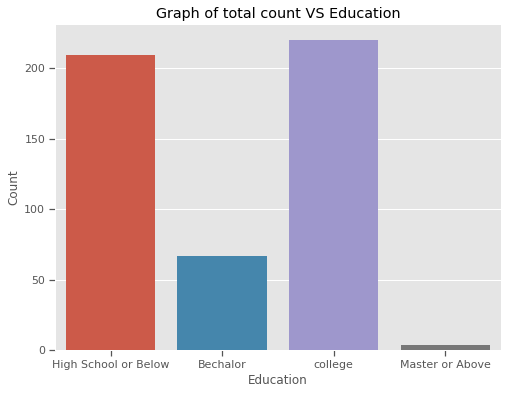

In [29]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x=kkdf["level_education"], y=kkdf["count"])
ax.set_title("Graph of total count VS Education")
ax.set_ylabel('Count')
ax.set_xlabel('Education')


In [30]:
list(df1)


['Loan_ID',
 'loan_status',
 'Principal',
 'terms',
 'effective_date',
 'due_date',
 'paid_off_time',
 'past_due_days',
 'age',
 'education',
 'Gender',
 'Loan_status_code',
 'Gender_code',
 'education_code']

In [31]:
columns = ['Principal',
 'terms',
 'effective_date',
 'due_date',
 'paid_off_time',
 'past_due_days',
 'age',
 'education',
 'Gender',
 'Loan_status_code',
 'Gender_code',
 'education_code']
features_1=df1[list(columns)].values


SyntaxError: invalid syntax (<ipython-input-31-556d14ba6923>, line 1)

In [ ]:
features_1


In [ ]:
my_tree_one = tree.DecisionTreeRegressor(criterion="mse", max_depth=3)
my_tree_one = my_tree_one.fit(features_1, target)

my_tree_one